In [2]:
import numpy as np
import cv2
import skfuzzy as fuzz
import matplotlib.pyplot as plt

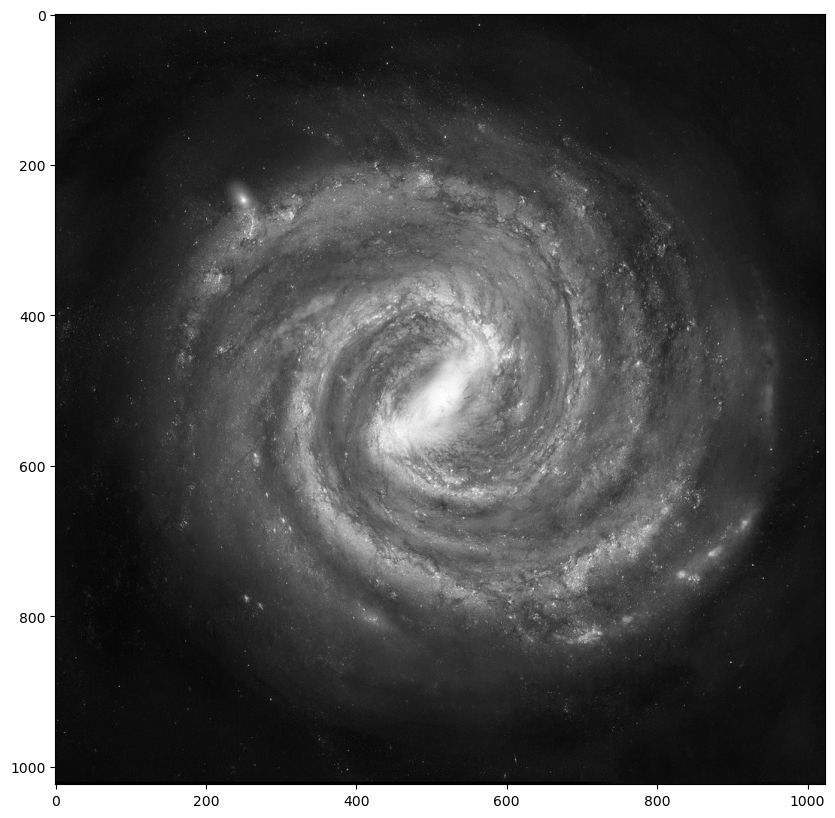

In [15]:
# Load the grayscale image
image_path = 'milky-way-nvg.jpg'  # Update this to the path where your grayscale image is stored
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [16]:
# Normalize the image for FCM
img_norm = image / 255.0
rows, cols = img_norm.shape

In [17]:
# Reshape the image into a feature vector for FCM
img_reshaped = img_norm.reshape(-1, 1)

In [18]:
# Fuzzy C-Means Clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    img_reshaped.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)



In [19]:
# Get the cluster membership for each pixel
cluster_membership = np.argmax(u, axis=0)



In [20]:
# Reshape the cluster membership back into image shape
segmented_image = cluster_membership.reshape(rows, cols)



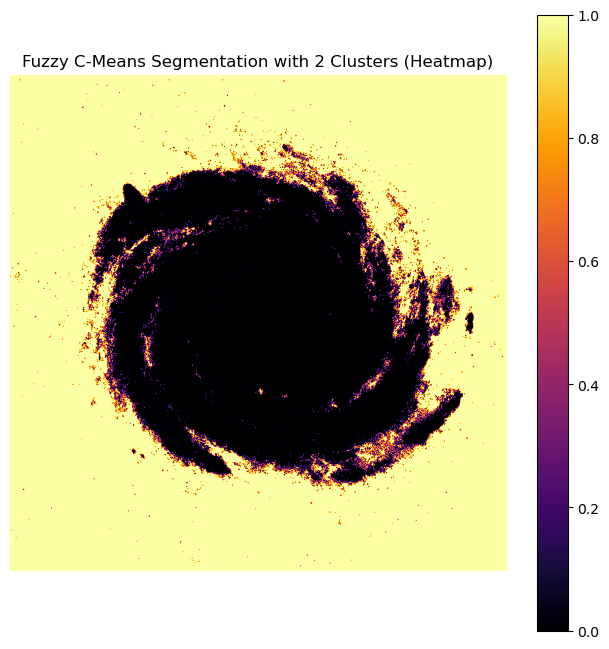

In [21]:
# Display the segmented image using a heatmap to show membership
plt.figure(figsize=(8, 8))
plt.imshow(segmented_image, cmap='inferno')
plt.colorbar()
plt.title('Fuzzy C-Means Segmentation with 2 Clusters (Heatmap)')
plt.axis('off')
plt.show()

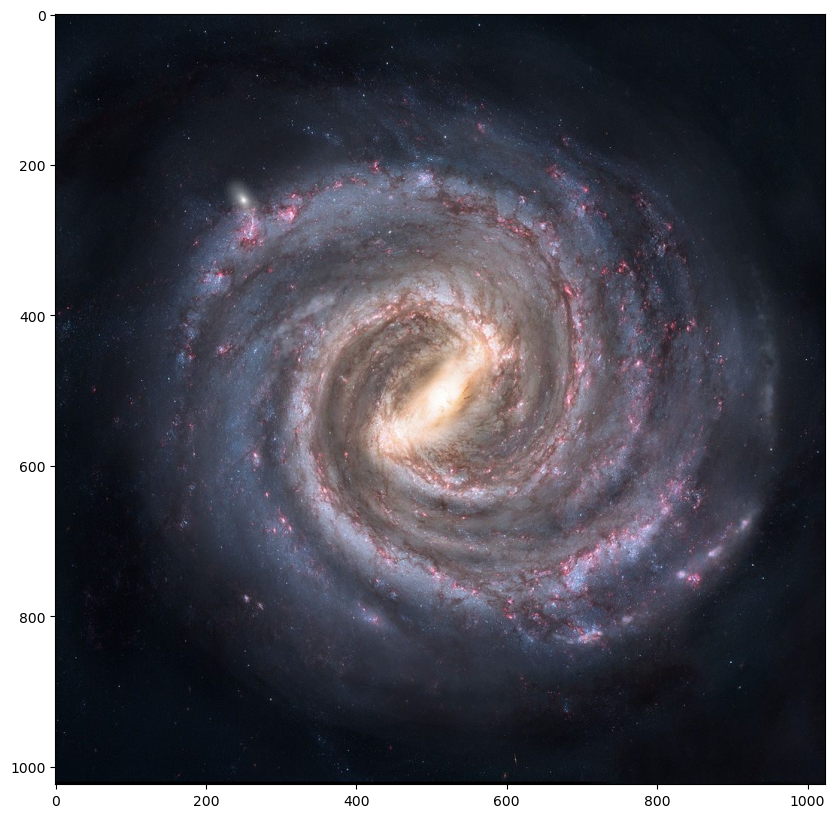

In [24]:
# Load the color image
image_path = 'milky-way.jpg'  # Update this with your color image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV format) to RGB
plt.figure(figsize=(10,10))
plt.imshow(image_rgb)

In [25]:
# Normalize the image for FCM
img_norm = image_rgb / 255.0
rows, cols, channels = img_norm.shape

In [26]:
# Reshape the image into a 2D array where each row is a pixel and each column is a color channel
img_reshaped = img_norm.reshape(-1, 3).T  # Transpose to match the expected input format for FCM

In [27]:
# Fuzzy C-Means Clustering
n_clusters = 2
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    img_reshaped, n_clusters, 2, error=0.005, maxiter=1000, init=None)

In [28]:
# Get the cluster membership for each pixel
cluster_membership = np.argmax(u, axis=0)

In [29]:
# Reshape the cluster membership back into image shape
segmented_image = cluster_membership.reshape(rows, cols)

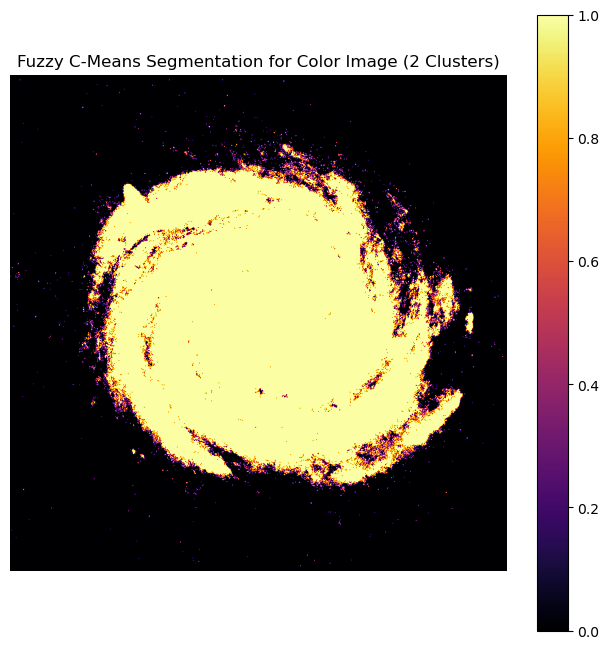

In [30]:
# Display the segmented image using a heatmap to show membership
plt.figure(figsize=(8, 8))
plt.imshow(segmented_image, cmap='inferno')
plt.colorbar()
plt.title('Fuzzy C-Means Segmentation for Color Image (2 Clusters)')
plt.axis('off')
plt.show()

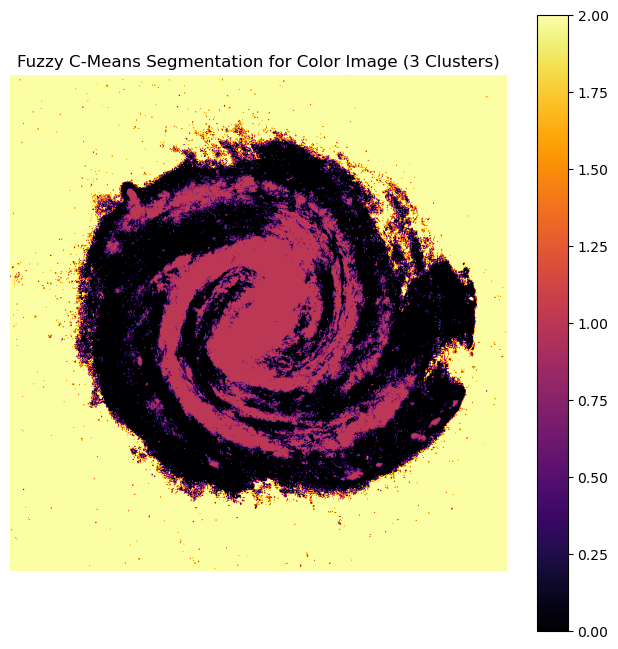

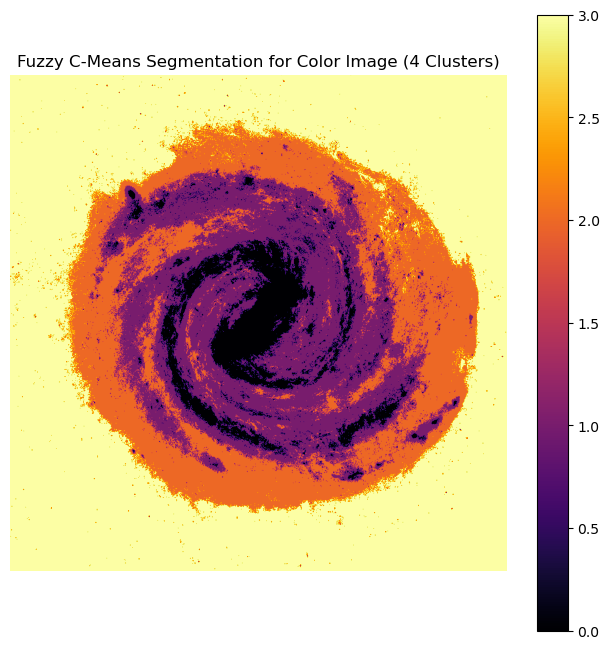

In [31]:
# Normalize the image for FCM
img_norm = image_rgb / 255.0
rows, cols, channels = img_norm.shape

# Reshape the image into a 2D array where each row is a pixel and each column is a color channel
img_reshaped = img_norm.reshape(-1, 3).T  # Transpose to match the expected input format for FCM

def fuzzy_cmeans_segmentation(img_reshaped, n_clusters):
    """ Apply Fuzzy C-means and return segmented image """
    # Fuzzy C-Means Clustering
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        img_reshaped, n_clusters, 2, error=0.005, maxiter=1000, init=None)

    # Get the cluster membership for each pixel
    cluster_membership = np.argmax(u, axis=0)

    # Reshape the cluster membership back into image shape
    segmented_image = cluster_membership.reshape(rows, cols)
    
    return segmented_image

def display_heatmap(segmented_image, n_clusters):
    """ Display the heatmap for the segmented image """
    plt.figure(figsize=(8, 8))
    plt.imshow(segmented_image, cmap='inferno')
    plt.colorbar()
    plt.title(f'Fuzzy C-Means Segmentation for Color Image ({n_clusters} Clusters)')
    plt.axis('off')
    plt.show()

# Segmentation with 3 clusters
segmented_image_3_clusters = fuzzy_cmeans_segmentation(img_reshaped, 3)
display_heatmap(segmented_image_3_clusters, 3)

# Segmentation with 4 clusters
segmented_image_4_clusters = fuzzy_cmeans_segmentation(img_reshaped, 4)
display_heatmap(segmented_image_4_clusters, 4)